In [1]:
# setting common plot params 
from matplotlib import rcParams

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
from collections import defaultdict

In [112]:
def build_groups_from_excel(excel_path):
    
    # load metadata
    df = pd.read_excel(excel_path)

    # Ensure lowercase consistency (optional)
    df['genotype'] = df['genotype'].str.upper()

    # Dictionaries to store groups
    genotype_age_groups = defaultdict(list)
    age_only_groups = defaultdict(list)

    # Iterate and populate
    for _, row in df.iterrows():
        dataset_id = row['ds']
        age = row['age']
        genotype = row['genotype']

        # group by genotype + age (e.g., GABA_p2)
        genotype_age_groups[f"{genotype}_{age}"].append(dataset_id)

        # group by age (emx-gad) (e.g., all_p2)
        age_only_groups[f"all_{age}"].append(dataset_id)

    return dict(genotype_age_groups), dict(age_only_groups)

In [53]:
pixelnmf_params = r'C:/Users/zaggila/Documents/pixelNMF/data_proc/pixelnmf_params.xlsx' # metadata xls 

# Make age and genotype groups based on pixelnmf_params (metadata file)

In [54]:
genotype_age_groups, age_groups = build_groups_from_excel(pixelnmf_params)

print(genotype_age_groups.keys())  # loads all dict_keys as genotype_age eg GAD_p1 or EMX_P3 and so on
print(age_groups.keys())  # loads all dict_keys as emx-gad_p1 so groups by age and genotype        

dict_keys(['EMX_p6', 'EMX_p5', 'EMX_p4', 'EMX_p3', 'EMX_0', 'GAD_p1', 'GAD_p2', 'GAD_p3', 'GAD_p4', 'GAD_p5', 'GAD_p6', 'GAD_p7', 'GAD_0', 'GAD_p8', 'GAD_p9', 'GAD_p10', 'EMX_p2', 'EMX_p1'])
dict_keys(['all_p6', 'all_p5', 'all_p4', 'all_p3', 'all_0', 'all_p1', 'all_p2', 'all_p7', 'all_p8', 'all_p9', 'all_p10'])


In [55]:
# print(genotype_age_groups['EMX_p3'])

# Load mousecraft outputs 

Requires updated metadata and mousecraft column == 1 for datasets we have validated using Mousecraft

## Calculate various behavioral metrices of interest and plot how they evolve along days (age groups) as well as per gentoype (age + genotype groups)

In [56]:
def read_params(pixelnmf_params, ds):

    # Load Excel file containing parameters
    df_params = pd.read_excel(pixelnmf_params)
    
    # define dataset 
    pd.options.display.float_format = '{:.3f}'.format
    
    params = df_params[df_params['ds'] == ds].iloc[0]
    
    # Assign parameters to variables
    genotype = params['genotype']
    blur_std = params['blur_std']
    downs_fact = params['downs_fact']
    res_orig = params['res_orig']
    x_axis = params['x_axis']
    y_axis = params['y_axis']
    original_FOV = params['original_FOV']
    framerate = params['framerate'] # (Hz)
    duration = params['duration'] #(s)
    n_components_elbow = params['n_components_elbow'] #cv_nmf output
    n_components_min = params['n_components_min'] #cv_nmf output
    age = params['age']
    weight_g = params['weight_g']
    s2p = params['s2p']
    cells = params['cells']
    Behaviour = params['Behaviour']
    mousecraft = params['mousecraft']
    SLEAP = params['SLEAP']
    
    # Calculate dependent parameters
    resolution = original_FOV / x_axis
    time_per_frame = 1 / framerate
    
    # Print table of parameters
    params_table = pd.DataFrame({
        'Parameter': ['genotype', 'blur_std', 'downs_fact', 'res_orig', 'x_axis', 'y_axis', 'original_FOV', 'framerate', 'duration', 'resolution', 'time_per_frame', 'n_components_elbow', 'n_components_min', 'age', 'weight_g', 's2p', 'cells', 'Behaviour', 'mousecraft', 'SLEAP'],
        'Value': [genotype, blur_std, downs_fact, res_orig, x_axis, y_axis, original_FOV, framerate, duration, resolution, time_per_frame, n_components_elbow, n_components_min, age, weight_g, s2p, cells, Behaviour, mousecraft, SLEAP]
    })
    
    styled_params_table = params_table.style.pipe(style_table).set_properties(**{'text-align': 'center'})

    # Display the styled table
    display(styled_params_table)
    
    return params_table, genotype, blur_std, downs_fact, res_orig, x_axis, y_axis,  original_FOV, framerate, duration, resolution, time_per_frame, n_components_elbow, n_components_min, age, weight_g, s2p, cells, Behaviour, mousecraft, SLEAP

In [58]:
#styling the parameter table
def style_table(styler):
    styler.set_table_styles([
        {'selector': 'thead th', 
         'props': [('font-weight', 'bold'), ('background-color', 'green'), ('color', 'white'), ('text-align', 'center')]},  # Green header with white text
        {'selector': 'tbody tr:nth-child(odd) td', 
         'props': [('background-color', 'black'), ('color', 'white'), ('text-align', 'center')]},  # Black background with white text for odd rows
        {'selector': 'tbody tr:nth-child(even) td', 
         'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center')]}  # White background with black text for even rows
    ])
    return styler

In [59]:
for group_name, ds_list in genotype_age_groups.items():
    print(f"\nProcessing group: {group_name}")
    for ds in ds_list:
        (
            params_table, genotype, blur_std, downs_fact, res_orig, x_axis, y_axis, original_FOV, framerate, duration, resolution, time_per_frame, n_components_elbow, n_components_min, age, weight_g, s2p, cells, Behaviour, mousecraft, SLEAP
        ) = read_params(pixelnmf_params, ds)

        # Use params for calculations (e.g., skip if mousecraft != 1)
        if mousecraft == 1:
            print(f"  {ds} -> Active dataset, {duration}s @ {framerate}Hz")


Processing group: EMX_p6


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,nan



Processing group: EMX_p5


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,nan


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,nan


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,nan


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1200
9,resolution,10.000000



Processing group: EMX_p4


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,0.820000
4,x_axis,42.000000
5,y_axis,42.000000
6,original_FOV,420.000000
7,framerate,2.840000
8,duration,1184
9,resolution,10.000000



Processing group: EMX_p3


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,111.000000
5,y_axis,111.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.162162


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,111.000000
5,y_axis,111.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,10.162162


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,111.000000
5,y_axis,111.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,10.162162


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,96.000000
5,y_axis,96.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,11.750000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.490000
4,x_axis,76.000000
5,y_axis,76.000000
6,original_FOV,763.000000
7,framerate,2.840000
8,duration,1200
9,resolution,10.039474


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,0.780000
4,x_axis,40.000000
5,y_axis,40.000000
6,original_FOV,400.000000
7,framerate,2.840000
8,duration,1200
9,resolution,10.000000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1200
9,resolution,10.000000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,0.960000
4,x_axis,49.000000
5,y_axis,49.000000
6,original_FOV,496.000000
7,framerate,3.330000
8,duration,800
9,resolution,10.122449


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1200
9,resolution,10.000000



Processing group: EMX_0


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:32: RuntimeWarning: invalid value encountered in scalar divide
  resolution = original_FOV / x_axis
C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,EMX
1,blur_std,0.000000
2,downs_fact,0
3,res_orig,0.000000
4,x_axis,0.000000
5,y_axis,0.000000
6,original_FOV,0.000000
7,framerate,0.000000
8,duration,0
9,resolution,nan



Processing group: GAD_p1


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


  sz091_2024-06-05_b -> Active dataset, 1200s @ 15.0Hz


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,113.000000
5,y_axis,130.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,600
9,resolution,11.752212


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.350000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,3.250000
8,duration,1200
9,resolution,10.000000


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.350000
4,x_axis,54.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,3.250000
8,duration,1200
9,resolution,10.185185



Processing group: GAD_p2


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,109.000000
5,y_axis,109.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.348624


  sz089_2024-06-04_a -> Active dataset, 1200s @ 15.0Hz


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,109.000000
5,y_axis,109.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.348624


  sz092_2024-06-06_a -> Active dataset, 1200s @ 15.0Hz


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,133.000000
5,y_axis,133.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,600
9,resolution,9.984962


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,133.000000
5,y_axis,133.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,600
9,resolution,9.984962


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,600
9,resolution,9.982301



Processing group: GAD_p3


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,109.000000
5,y_axis,109.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.348624


  sz092_2024-06-07_a -> Active dataset, 1200s @ 15.0Hz


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,0.734000
4,x_axis,73.000000
5,y_axis,73.000000
6,original_FOV,751.600000
7,framerate,15.000000
8,duration,1200
9,resolution,10.295890



Processing group: GAD_p4


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,129.000000
5,y_axis,129.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.294574


  sz089_2024-06-06_a -> Active dataset, 1200s @ 15.0Hz


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,129.000000
5,y_axis,129.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.294574


  sz090_2024-06-06_a -> Active dataset, 1200s @ 15.0Hz


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,133.000000
5,y_axis,133.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.984962


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1200
9,resolution,10.000000



Processing group: GAD_p5


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,2.200000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,30.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,0.000000
8,duration,1200
9,resolution,nan


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,129.000000
5,y_axis,129.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.294574


  sz089_2024-06-07_a -> Active dataset, 1200s @ 15.0Hz


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,129.000000
5,y_axis,129.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.294574


  sz090_2024-06-07_a -> Active dataset, 1200s @ 15.0Hz


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,133.000000
5,y_axis,133.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,600
9,resolution,9.984962



Processing group: GAD_p6


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,30.000000
8,duration,1800
9,resolution,nan


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,30.000000
8,duration,1800
9,resolution,nan



Processing group: GAD_p7


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,30.000000
8,duration,1800
9,resolution,nan



Processing group: GAD_0


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:32: RuntimeWarning: invalid value encountered in scalar divide
  resolution = original_FOV / x_axis
C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,GAD
1,blur_std,0.000000
2,downs_fact,0
3,res_orig,0.000000
4,x_axis,0.000000
5,y_axis,0.000000
6,original_FOV,0.000000
7,framerate,0.000000
8,duration,0
9,resolution,nan


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:32: RuntimeWarning: invalid value encountered in scalar divide
  resolution = original_FOV / x_axis
C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,GAD
1,blur_std,0.000000
2,downs_fact,0
3,res_orig,0.000000
4,x_axis,0.000000
5,y_axis,0.000000
6,original_FOV,0.000000
7,framerate,0.000000
8,duration,0
9,resolution,nan



Processing group: GAD_p8


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,30.000000
8,duration,1200
9,resolution,nan


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,30.000000
8,duration,1200
9,resolution,nan



Processing group: GAD_p9


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,0.000000
8,duration,1200
9,resolution,nan



Processing group: GAD_p10


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,0.000000
8,duration,1200
9,resolution,nan



Processing group: EMX_p2


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,129.000000
5,y_axis,129.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.294574


  sz095_2025-01-09_b -> Active dataset, 1200s @ 15.0Hz


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,109.000000
5,y_axis,109.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.348624



Processing group: EMX_p1


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1000
9,resolution,10.000000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1200
9,resolution,10.000000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.540000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,3.250000
8,duration,1200
9,resolution,10.000000


 # Load all params for each ds in a dictionary 

In [11]:
pixelnmf_params_excel = pd.read_excel(pixelnmf_params)

In [84]:
pixelnmf_params_excel

,ds,genotype,blur_std,downs_fact,x_axis,y_axis,original_FOV,framerate,duration,res_orig,...,age,weight_g,s2p,cells,Behaviour,mousecraft,SLEAP,notes,Unnamed: 20,Unnamed: 21
0,sz120_2025_06_10_a,EMX,1.500,10,NaN,NaN,1128.000,15.000,1200,1.102,...,p6,3.000,NaN,0.000,1.000,0.000,0.000,"# a bit bloody, no fluox",NaN,NaN
1,sz120_2025_06_09_c,EMX,1.500,10,NaN,NaN,1128.000,15.000,1200,1.102,...,p5,2.800,NaN,0.000,1.000,0.000,0.000,# blood_and_accidentally_tail_injured (no fluo...,NaN,NaN
2,sz120_2025_06_09_b,EMX,1.500,10,NaN,NaN,1128.000,15.000,1200,1.102,...,p5,2.800,NaN,0.000,1.000,0.000,0.000,# second_before_fluox,NaN,NaN
3,sz120_2025_06_09_a,EMX,1.500,10,NaN,NaN,1128.000,15.000,1800,1.102,...,p5,2.800,NaN,0.000,1.000,0.000,0.000,NaN,NaN,NaN
4,sz119_2025_06_08_a,EMX,1.500,10,113.000,113.000,1128.000,15.000,1800,1.102,...,p4,2.300,NaN,0.000,1.000,0.000,0.000,# cam2 26962 so just - 38 frames becs of resta...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,sz018_2022-01-21_b,EMX,1.500,10,55.000,55.000,550.000,5.100,1200,1.740,...,p3,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN
82,sz016_2022-01-10_b,GAD,1.500,10,55.000,55.000,550.000,5.100,1200,1.740,...,p4,5.400,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN
83,sz015_2022-01-07_b,GAD,1.500,10,55.000,55.000,550.000,3.250,1200,1.350,...,p1,1.600,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN
84,sz014_2022-01-07_c,GAD,1.500,10,54.000,55.000,550.000,3.250,1200,1.350,...,p1,1.800,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN


In [12]:
all_params = {}
for dataset in pixelnmf_params_excel['ds']:
    all_params[dataset] = read_params(pixelnmf_params, dataset)

,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,nan


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,nan


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,nan


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,nan


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,111.000000
5,y_axis,111.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.162162


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:32: RuntimeWarning: invalid value encountered in scalar divide
  resolution = original_FOV / x_axis
C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,EMX
1,blur_std,0.000000
2,downs_fact,0
3,res_orig,0.000000
4,x_axis,0.000000
5,y_axis,0.000000
6,original_FOV,0.000000
7,framerate,0.000000
8,duration,0
9,resolution,nan


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,111.000000
5,y_axis,111.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,10.162162


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,111.000000
5,y_axis,111.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,10.162162


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,96.000000
5,y_axis,96.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,11.750000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,2.200000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,30.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,30.000000
8,duration,1800
9,resolution,nan


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:32: RuntimeWarning: invalid value encountered in scalar divide
  resolution = original_FOV / x_axis
C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,GAD
1,blur_std,0.000000
2,downs_fact,0
3,res_orig,0.000000
4,x_axis,0.000000
5,y_axis,0.000000
6,original_FOV,0.000000
7,framerate,0.000000
8,duration,0
9,resolution,nan


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,30.000000
8,duration,1800
9,resolution,nan


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,30.000000
8,duration,1800
9,resolution,nan


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,30.000000
8,duration,1200
9,resolution,nan


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,30.000000
8,duration,1200
9,resolution,nan


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1800
9,resolution,9.982301


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,0.000000
8,duration,1200
9,resolution,nan


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,0.000000
8,duration,1200
9,resolution,nan


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:32: RuntimeWarning: invalid value encountered in scalar divide
  resolution = original_FOV / x_axis
C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,GAD
1,blur_std,0.000000
2,downs_fact,0
3,res_orig,0.000000
4,x_axis,0.000000
5,y_axis,0.000000
6,original_FOV,0.000000
7,framerate,0.000000
8,duration,0
9,resolution,nan


C:\Users\zaggila\AppData\Local\Temp\ipykernel_18944\3877360789.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  time_per_frame = 1 / framerate


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.400000
4,x_axis,nan
5,y_axis,nan
6,original_FOV,752.500000
7,framerate,0.000000
8,duration,1200
9,resolution,nan


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,129.000000
5,y_axis,129.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.294574


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,109.000000
5,y_axis,109.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.348624


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,129.000000
5,y_axis,129.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.294574


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,109.000000
5,y_axis,109.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.348624


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,109.000000
5,y_axis,109.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.348624


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,129.000000
5,y_axis,129.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.294574


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,109.000000
5,y_axis,109.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.348624


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.982301


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,129.000000
5,y_axis,129.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.294574


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,129.000000
5,y_axis,129.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,10.294574


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,0.734000
4,x_axis,73.000000
5,y_axis,73.000000
6,original_FOV,751.600000
7,framerate,15.000000
8,duration,1200
9,resolution,10.295890


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,133.000000
5,y_axis,133.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,1200
9,resolution,9.984962


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,133.000000
5,y_axis,133.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,600
9,resolution,9.984962


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,133.000000
5,y_axis,133.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,600
9,resolution,9.984962


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,133.000000
5,y_axis,133.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,600
9,resolution,9.984962


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.296000
4,x_axis,113.000000
5,y_axis,130.000000
6,original_FOV,1328.000000
7,framerate,15.000000
8,duration,600
9,resolution,11.752212


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.102000
4,x_axis,113.000000
5,y_axis,113.000000
6,original_FOV,1128.000000
7,framerate,15.000000
8,duration,600
9,resolution,9.982301


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,0.820000
4,x_axis,42.000000
5,y_axis,42.000000
6,original_FOV,420.000000
7,framerate,2.840000
8,duration,1184
9,resolution,10.000000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.490000
4,x_axis,76.000000
5,y_axis,76.000000
6,original_FOV,763.000000
7,framerate,2.840000
8,duration,1200
9,resolution,10.039474


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,0.780000
4,x_axis,40.000000
5,y_axis,40.000000
6,original_FOV,400.000000
7,framerate,2.840000
8,duration,1200
9,resolution,10.000000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1200
9,resolution,10.000000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1200
9,resolution,10.000000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,0.960000
4,x_axis,49.000000
5,y_axis,49.000000
6,original_FOV,496.000000
7,framerate,3.330000
8,duration,800
9,resolution,10.122449


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1000
9,resolution,10.000000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1200
9,resolution,10.000000


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1200
9,resolution,10.000000


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.740000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,5.100000
8,duration,1200
9,resolution,10.000000


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.350000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,3.250000
8,duration,1200
9,resolution,10.000000


,Parameter,Value
0,genotype,GAD
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.350000
4,x_axis,54.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,3.250000
8,duration,1200
9,resolution,10.185185


,Parameter,Value
0,genotype,EMX
1,blur_std,1.500000
2,downs_fact,10
3,res_orig,1.540000
4,x_axis,55.000000
5,y_axis,55.000000
6,original_FOV,550.000000
7,framerate,3.250000
8,duration,1200
9,resolution,10.000000


# Goals:

Load your pixelnmf_params table (Excel) into a DataFrame.

Filter datasets where mousecraft == 1.

Parse dataset name to reconstruct path:

Extract first part sz089 (mouse ID).

Extract rest (date) and append path segments accordingly.

For each such dataset, open the validation_MF_final.xls.

Count twitches and active motions by:

Filtering status column to only include "accepted", "manually added", or "edited".

Summing counts and durations from onset–offset frames.

Convert frames to seconds using framerate and duration from your metadata.

In [13]:
from pathlib import Path

In [14]:
#example path: 
# data_proc/
#    cells/
#       sz089/
#          2024-06-06_a/
#              mousecraft/
#                  validation_MF_final.xls

# Load and read validations_HF_final.xls

In [101]:
def load_mousecraft_validations(params_path, data_root=None, mode="cells"): #or pixels depeds on ds
    # Load metadata
    params_df = pd.read_excel(params_path)

    # Filter only datasets with Mousecraft = 1
    mc_df = params_df[params_df['mousecraft'] == 1]

    results = {}

    for _, row in mc_df.iterrows():
        ds = row['ds']  # e.g. 'sz089_2024-06-06_a_cell_control'
        framerate = row['framerate']
        duration = row['duration']  # in seconds

        # Parse mouse_id and session
        parts = ds.split('_')
        mouse_id = parts[0]  # 'sz089'
        session = parts[1] + "_" + parts[2]  # '2024-06-06_a'

        # Build path: data_proc/cells/sz089/2024-06-06_a/mousecraft/validation_MF_final.xls
        validation_path = Path(data_root) / mode / mouse_id / session / 'mousecraft' / 'validation_HF_final.xlsx'

        if not validation_path.exists():
            print(f"⚠️ Missing Mousecraft file for {ds} at {validation_path}")
            continue

        # Load Mousecraft validation
        val_df = pd.read_excel(validation_path)

        # Filter only accepted / edited / manually added
        valid_events = val_df[val_df['status'].isin(['accepted', 'edited', 'manually added'])]
        
        # Separate twitches and active motions
        twitches = valid_events[valid_events['event_type'] == 'twitch']
        active = valid_events[valid_events['event_type'] == 'active']

        # Count motions 
        twitch_count = len(twitches)
        active_motion_count = len(active)

        # compute duration of twitches (how much time from Rest is attributed to twitching ?)
        twitch_durations = ((twitches['offset'] - twitches['onset'])/framerate).tolist()
        mean_twitch_duration = np.mean(twitch_durations)
        
        # compute ITI (inter-twitch interval)
        inter_twitch_intrvl = np.diff(twitches['onset'])/framerate
        mean_inter_twitch_intrvl = np.mean(inter_twitch_intrvl)

        # compute duration of active motions 

        if len(active) == 0: # in case there are no active motions 
            active_motion_durations = 0
            mean_active_motion_duration = np.nan
            inter_active_motion_intrvl = []
        else:
            active_motion_durations = ((active['offset'] - active['onset'])/framerate).tolist()
            mean_active_motion_duration = np.mean(active_motion_durations)
            # active ITI 
            inter_active_motion_intrvl = np.diff(active['onset'])/framerate
            mean_inter_active_motion_intrvl = np.mean(inter_active_motion_intrvl)

        # Compute time in active motion (awake) 
        active_motion_time_sec = 0
        for _, e in active.iterrows():
            onset = e['onset']
            offset = e['offset']
            active_motion_time_sec += (offset - onset) / framerate
        
        total_time_sec = duration
        
        #compute time in rest (sleep)
        rest_time_sec = total_time_sec - active_motion_time_sec
        twitch_frequency = twitch_count / rest_time_sec # in Hz 

        # Save all metrices we are interested in  
        results[ds] = {
            "twitch_count": twitch_count,
            'twitch_frequency': twitch_frequency,
            'twitch_durations': twitch_durations, 
            'mean_twitch_duration': mean_twitch_duration,
            'twitch_intervals': inter_twitch_intrvl,
            'mean_twitch_interval': mean_inter_twitch_intrvl,
            
            'active_motion_count': active_motion_count,
            'active_motion_durations': active_motion_durations,
            'mean_active_motion_duration': mean_active_motion_duration,
            'active_motion_intervals': inter_active_motion_intrvl,
            'mean_active_motion_interval': mean_inter_active_motion_intrvl,

            # % in Awake - Rest (sleep)
            "active_motion_time_sec": active_motion_time_sec,
            "rest_time_sec": rest_time_sec,
            "total_time_sec": total_time_sec
        }

    return pd.DataFrame.from_dict(results, orient='index').reset_index().rename(columns={'index': 'ds'}) # dataframe to merge with metadata xls 

In [102]:
mousecraft_validated_beh_results = load_mousecraft_validations(pixelnmf_params, data_root=r'C:\Users\zaggila\Documents\pixelNMF\data_proc', mode="cells")

⚠️ Missing Mousecraft file for sz089_2024-06-06_a at C:\Users\zaggila\Documents\pixelNMF\data_proc\cells\sz089\2024-06-06_a\mousecraft\validation_HF_final.xlsx
⚠️ Missing Mousecraft file for sz092_2024-06-06_a at C:\Users\zaggila\Documents\pixelNMF\data_proc\cells\sz092\2024-06-06_a\mousecraft\validation_HF_final.xlsx
⚠️ Missing Mousecraft file for sz092_2024-06-07_a at C:\Users\zaggila\Documents\pixelNMF\data_proc\cells\sz092\2024-06-07_a\mousecraft\validation_HF_final.xlsx
⚠️ Missing Mousecraft file for sz095_2025-01-09_b at C:\Users\zaggila\Documents\pixelNMF\data_proc\cells\sz095\2025-01-09_b\mousecraft\validation_HF_final.xlsx
⚠️ Missing Mousecraft file for sz091_2024-06-05_b at C:\Users\zaggila\Documents\pixelNMF\data_proc\cells\sz091\2024-06-05_b\mousecraft\validation_HF_final.xlsx
⚠️ Missing Mousecraft file for sz090_2024-06-07_a at C:\Users\zaggila\Documents\pixelNMF\data_proc\cells\sz090\2024-06-07_a\mousecraft\validation_HF_final.xlsx
⚠️ Missing Mousecraft file for sz090_202

In [103]:
results # e

{'sz089_2024-06-04_a': {'twitch_count': 236,
  'twitch_frequency': 0.24003254678600489,
  'active_motion_time_sec': 216.80000000000007,
  'rest_time_sec': 983.1999999999999,
  'total_time_sec': 1200},
 'sz089_2024-06-07_a': {'twitch_count': 99,
  'twitch_frequency': 0.0825,
  'active_motion_time_sec': 0,
  'rest_time_sec': 1200,
  'total_time_sec': 1200}}

In [105]:
# Merge with metadata pixelnmf_params .xls (so we have all info in one pandas dataframe) or we could do with dict 
merged_df = mousecraft_validated_beh_results.merge(pixelnmf_params_excel, on='ds', how='left')

# Plots (examples)

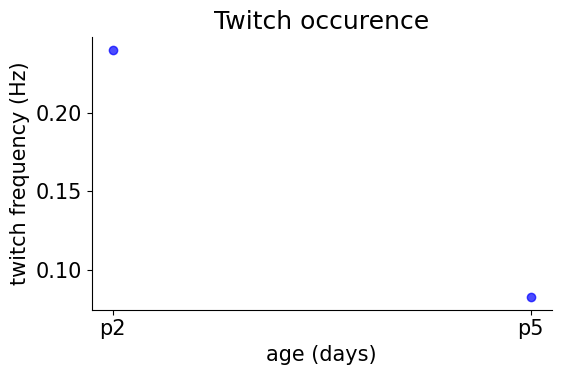

In [106]:
plt.figure(figsize=(6,4))
plt.scatter(merged_df['age'], merged_df['twitch_frequency'], c='blue', alpha=0.7)
plt.xlabel('age (days)')
plt.ylabel('twitch frequency (Hz)')
plt.title('Twitch occurence')
plt.tight_layout()
plt.show()

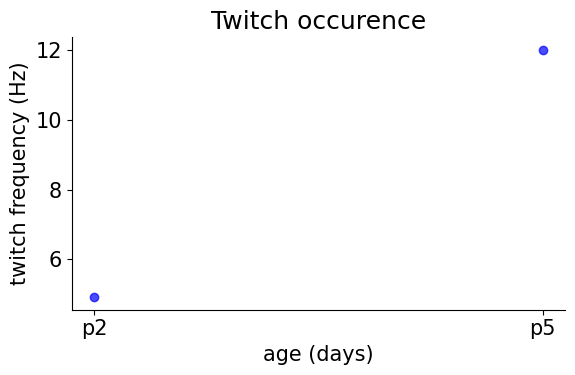

In [107]:
plt.figure(figsize=(6,4))
plt.scatter(merged_df['age'], merged_df['mean_twitch_interval'], c='blue', alpha=0.7)
plt.xlabel('age (days)')
plt.ylabel('twitch frequency (Hz)')
plt.title('Twitch occurence')
plt.tight_layout()
plt.show()

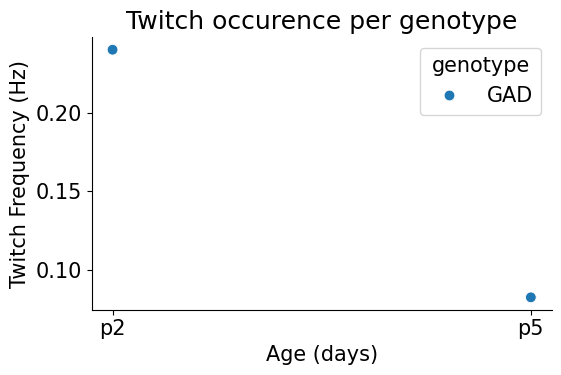

In [108]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=merged_df, x='age', y='twitch_frequency', hue='genotype', style='genotype', s=60, color='r')
plt.xlabel('Age (days)')
plt.ylabel('Twitch Frequency (Hz)')
plt.title('Twitch occurence per genotype')
plt.tight_layout()
plt.show()

# The Maxime Challenge 2025 

- Can you plot how the above variables change as a function of age ? For example plot twitch_frequency, twitch_duration for each twitch per ds or mean_twitch_duration per ds (as violin plots or barplots or even scatterplots) ? Can you see any interesting differences, eg. % time in active - rest change or not ?
  
- Can you see any differences per genotype ? Eg compare twitch frequency or active-sleep % time in emx - vs gad pups along ages

- Can you think of other interesting metrices to compute ? For example, what about some simple plots on mousecraft performance, like ratio of accepted + edited / rejected twitches and same for active motions ? If ratio is big then accepted + edited > rejected, if else: rejected > accepted + edited

- Bonus: Plot the eye along the motion energy in a subplot (we have the eye signal for few pups and check whether high eye motion periods corresponf to active or rest periods more ? This hints to next analysis and is nice for discussion in your ppt and report.

Tip: Plot all variables of interest along days and win a kinderbueno!